
## AICE Associate 자격인증 샘플문항

### E-commerce Shipping 데이터 세트: 고객 및 배송 데이터를 이용한 배송 정시 도착 여부 예측 문제

- 데이터 출처 : https://www.kaggle.com/prachi13/customer-analytics

- 고객의 구매 정보와 배송 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 제품이 정시에 도착할지 여부(지연 여부)를 예측하고 결과를 분석하세요.

---

### [유의사항]

- 각 문항의 답안코드는 반드시 `# 여기에 답안코드를 작성하세요` 로 표시된 cell에 작성해야 합니다.
- 제공된 시험문항 cell을 삭제하거나 답안 위치가 아닌 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
- 시험 중에는 상단의 '임시저장' 버튼을 클릭하여 저장을 해주시고, 답안 제출시에는 '최종제출' 버튼을 클릭해주시기 바랍니다.
- 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
- 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
- 자격인증 문제에 제공된 데이터는 제 3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.
- **오픈북 허용사이트에서만 참고 가능하며 그외 사이트 참고시 부정행위로 간주될수 있습니다.**

---

### [ 데이터 컬럼 설명 (데이터 파일명: e-comm.csv) ]

* **ID** : 고객 ID (고유 식별자)
* **Warehouse_block** : 창고 블록 (A, B, C, D, E로 구분됨)
* **Mode_of_Shipment** : 배송 방법 (Ship, Flight, Road)
* **Customer_care_calls** : 배송 조회 관련 고객센터 문의 횟수
* **Customer_rating** : 고객이 부여한 평점 (1: 최악, 5: 최고)
* **Cost_of_the_Product** : 제품 가격 (USD 달러 기준)
* **Prior_purchases** : 이전 구매 횟수
* **Product_importance** : 회사에서 분류한 제품 중요도 (low, medium, high)
* **Gender** : 고객 성별 (M: 남성, F: 여성)
* **Discount_offered** : 해당 제품에 제공된 할인 금액
* **Weight_in_gms** : 제품의 무게 (그램 단위)
* **Reached.on.Time_Y.N** : 정시 도착 여부 (1: 제시간에 도착하지 않음[지연], 0: 제시간에 도착함)




In [1]:
# 다음 코드를 실행하여 데이터 파일과 부속 파일을 다운로드 하세요.
import urllib.request

BASE = "https://raw.githubusercontent.com/metamath1/aicebook/main/ch05"

urllib.request.urlretrieve(f"{BASE}/2cls/e-comm/e-comm.csv", "e-comm.csv")
urllib.request.urlretrieve(f"{BASE}/aice_ans.py", "aice_ans.py")
urllib.request.urlretrieve(f"{BASE}/2cls/e-comm/answer_config.json", "answer_config.json")

('answer_config.json', <http.client.HTTPMessage at 0x7ea1e0838320>)

## 기초정보 확인 및 시각화

1. Pandas 함수로 csv파일을 읽어 df에 할당하는 코드를 작성하세요.
    - df에 포함된 샘플의 개수를 '답안01'변수에 대입하세요.(예: 답안01 = 1000)

In [2]:
# 여기 답안 코드를 작성하세요.
import pandas as pd

df = pd.read_csv("e-comm.csv")
print(df.shape)

답안01 = 8799

(8799, 12)


#### 문제 1 해설

이 문제는 Pandas의 가장 기본적인 작업인 CSV 파일 읽기와 데이터프레임의 크기 확인을 다룹니다. `read_csv()` 함수로 파일을 불러오고, `shape` 속성으로 행과 열의 개수를 파악하는 것이 핵심입니다.

먼저 pandas 라이브러리를 import하고, `read_csv()` 함수로 e-comm.csv 파일을 읽어옵니다. 이 함수는 CSV 파일의 경로를 문자열로 받아 데이터프레임 객체를 반환합니다.

파일이 정상적으로 로딩되었는지 확인하기 위해 `shape` 속성을 출력합니다. shape는 (행 개수, 열 개수) 형태의 튜플을 반환하므로, 첫 번째 값이 전체 샘플의 개수입니다.

출력 결과에서 첫 번째 값이 포함된 샘플의 개수입니다. `shape` 속성은 메서드가 아니라 속성이므로 괄호 없이 사용한다는 점을 기억하세요. `df.shape()`처럼 작성하면 오류가 발생합니다.

> 참고: 문제 풀이 도중 필요한 정보를 `print()`로 출력할 수 있습니다. 하지만 문제 풀이가 끝나고 답안 변수에 답을 대입했다면 `print()`같은 보조 코드는 주석처리하거나 지우는 것이 안전합니다. 불필요한 출력이 있으면 자동 채점 프로그램이 오류를 일으킬 가능성이 있기 때문에 제출 전에는 반드시 보조 코드는 모두 정리하는 것 잊지 마세요!



2. 데이터 셋은 2진 분류 데이터 셋입니다. 구분하고자 하는 타겟 변수가 고르게 분포되어있는지 확인하세요.
    - seaborn을 사용하세요.
    - 출력된 그래프를 보고 두 클래스가 중 샘플이 더 많은 클래스 번호를 '답안02' 변수에 대입하세요.(예: 답안02 = 0)

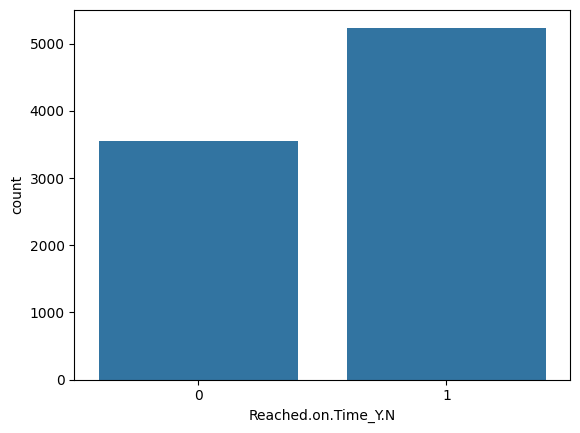

In [3]:
# 여기 답안 코드를 작성하세요.
import seaborn as sns

sns.countplot(data=df, x='Reached.on.Time_Y.N')

답안02 = 1

#### 문제 2 해설

이 문제는 seaborn을 사용한 범주형 데이터 시각화를 다룹니다. `countplot()`은 각 범주의 빈도를 막대그래프로 표현하는 함수로, 데이터 분포를 한눈에 파악할 때 유용합니다.

`countplot()`에서 `data` 매개변수로 데이터프레임을 지정하고, `x` 매개변수로 시각화할 열 이름을 문자열로 전달합니다. 이 문제에서는 'Reached.on.Time_Y.N' 열의 값별 개수를 확인하고 있습니다.

생성된 그래프를 보면 0과 1 두 개의 범주가 있고, 각 막대의 높이가 해당 범주의 샘플 개수를 나타냅니다. 0값을 가진 샘플이 약 3500개, 1값을 가진 샘플이 약 5200개로 보이며, 1이 더 많은 클래스임을 알 수 있습니다. 따라서 더 많은 클래스의 번호는 1입니다.

> 참고: `countplot()`은 별도로 `value_counts()`를 계산하지 않아도 자동으로 각 범주의 빈도를 세어 시각화합니다. 정확한 개수가 필요하다면 `df['열이름'].value_counts()`로 확인할 수 있습니다.

3.  창고(Warehouse_block)별 배송방식(Mode_of_Shipment)의 분포가 상이한지 알아보고 싶습니다. 이를 확인할 수 있는 시각화를 수행하세요.
    - seaborn을 사용하세요.
    - 출력된 그래프를 보고 모든 물류 창고에서 가장 많이 사용한 배송방식을 '답안03' 변수에 대입하세요.(예: 답안03 = 'Road', 대소문자 구분하세요.)

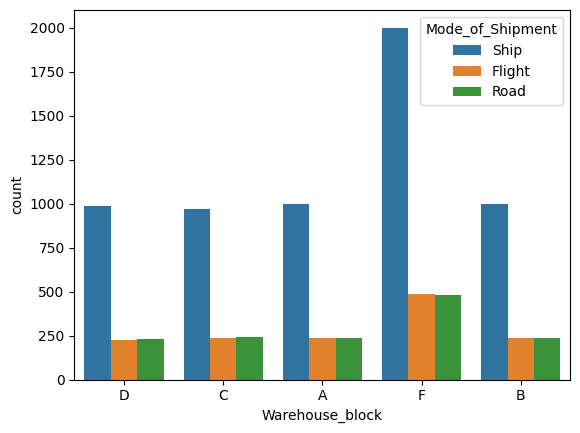

In [4]:
# 여기 답안 코드를 작성하세요.
sns.countplot(data=df, x="Warehouse_block", hue="Mode_of_Shipment")

답안03 = 'Ship'

#### 문제 3 해설

이 문제는 두 개의 범주형 변수 간의 관계를 시각화하는 방법을 다룹니다. `countplot()`에서 `hue` 매개변수를 사용하면 하나의 범주를 다른 범주로 세분화하여 표현할 수 있습니다.

`x` 매개변수에 'Warehouse_block'을 지정하여 x축에 창고를 배치하고, `hue` 매개변수에 'Mode_of_Shipment'를 지정하여 각 창고 내에서 배송방식별로 막대를 구분합니다. 이렇게 하면 각 창고에서 어떤 배송방식이 많이 사용되는지 비교할 수 있습니다.

그래프를 보면 모든 창고에서 Ship(파란색)이 가장 많이 사용되고, Flight(주황색)와 Road(초록색)는 비슷한 수준으로 사용됩니다. 특히 F 창고에서 Ship의 사용 빈도가 약 2000건으로 가장 높게 나타납니다. 모든 창고에서 가장 많이 사용된 배송방식은 Ship입니다.


4. 고객 평점(Customer rating)에 따라 할인율(Discount offered)이 달라지는지 시각화로 확인하세요.

    - seaborn의 boxplot을 활용하세요.
    - 그래프를 보고 고객 평점이 낮을수록 높은 할인율을 제공받는 경향이 있는지 판단하여, “그렇다”면 답안04 = 1, “아니다”면 답안04 = 0 으로 작성하세요.

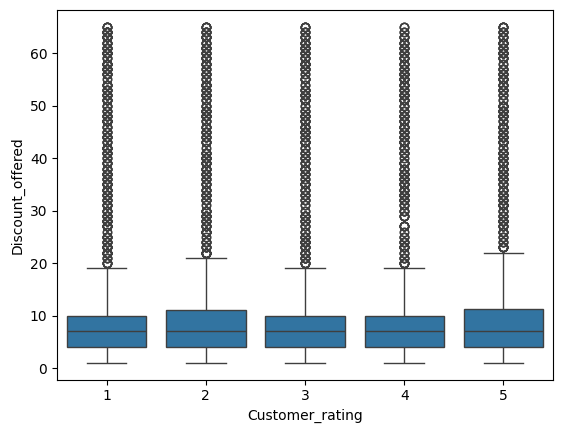

In [5]:
sns.boxplot(data=df, x='Customer_rating', y='Discount_offered')

답안04 = 0

#### 문제 4 해설

이 문제는 범주형 변수와 연속형 변수 간의 관계를 boxplot으로 시각화하는 방법을 다룹니다. `boxplot()`은 각 범주별로 연속형 변수의 분포를 상자그림으로 표현하여 중앙값, 사분위수, 이상치 등을 한눈에 파악할 수 있게 합니다.

`x` 매개변수에 'Customer_rating'을 지정하여 x축에 고객 평점을 배치하고, `y` 매개변수에 'Discount_offered'를 지정하여 각 평점별로 할인율의 분포를 표시합니다.

그래프를 보면 모든 고객 평점(1~5)에서 할인율의 중앙값과 박스 범위가 거의 동일합니다. 각 평점 그룹의 상자 위치와 크기가 유사하므로, 고객 평점에 따라 할인율이 달라지는 명확한 경향성은 없습니다. 위쪽에 많은 점들이 이상치로 표시되어 있는데, 이는 일부 주문에서 높은 할인율이 제공되었음을 의미합니다.

5. 제품 중요도(Product_importance)가 높은 제품을 반복적으로 구매한 고객을 알고 싶습니다. 고객의 과거 구매 횟수(Prior_purchases) 5회 이상이고, 제품 중요도가 'high'인 상품을 구매한 경우만 선택하세요.

    - 해당 조건을 만족하는 샘플의 개수를 구하여 답안05 변수에 저장하세요.

In [6]:
# 여기 답안 코드를 작성하세요.
cond = (df['Prior_purchases'] >= 5) & (df['Product_importance'] == 'high')
filtered_df = df[cond]

답안05 = len(filtered_df) # 143

#### 문제 5 해설

이 문제는 여러 조건을 동시에 만족하는 데이터를 필터링하는 방법을 다룹니다. pandas에서 `&` 연산자를 사용하면 복수의 조건을 결합할 수 있으며, 각 조건은 괄호로 묶어야 합니다.

첫 번째 조건 `(df['Prior_purchases'] >= 5)`는 과거 구매 횟수가 5회 이상인 행을 선택하고, 두 번째 조건 `(df['Product_importance'] == 'high')`는 제품 중요도가 'high'인 행을 선택합니다. 두 조건을 `&`로 연결하면 두 조건을 모두 만족하는 행만 남습니다.

이렇게 생성된 불리언 시리즈 `cond`를 인덱싱에 사용하여 `df[cond]`로 조건을 만족하는 데이터프레임을 얻고, `len()` 함수로 행의 개수를 계산합니다. 결과는 143개로, 과거 구매 5회 이상이면서 제품 중요도가 high인 샘플이 143개임을 의미합니다.

6. 예측하고자 하는 타겟 변수를 y에 대입하고 나머지 변수를 X에 대입하세요.
    - 분리 후 X의 데이터 타입을 확인하고 수치형 변수의 개수를 '답안06'에 대입하세요.

In [7]:
# 여기 답안 코드를 작성하세요.

# X, y 분리
y = df['Reached.on.Time_Y.N']
X = df.drop('Reached.on.Time_Y.N', axis=1)

# 데이터 타입 확인
X.info()

답안06 = 7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8799 non-null   int64 
 1   Warehouse_block      8799 non-null   object
 2   Mode_of_Shipment     8799 non-null   object
 3   Customer_care_calls  8799 non-null   int64 
 4   Customer_rating      8799 non-null   int64 
 5   Cost_of_the_Product  8799 non-null   int64 
 6   Prior_purchases      8799 non-null   int64 
 7   Product_importance   8799 non-null   object
 8   Gender               8799 non-null   object
 9   Discount_offered     8799 non-null   int64 
 10  Weight_in_gms        8799 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 756.3+ KB


#### 문제 6 해설

이 문제는 머신러닝 모델 학습을 위해 특성과 타겟을 분리하는 기본 작업을 다룹니다. 타겟 변수 y는 예측하고자 하는 값이고, 특성 변수 X는 예측에 사용되는 입력 데이터입니다.

먼저 타겟 변수를 분리합니다. `df['Reached.on.Time_Y.N']`로 해당 열을 시리즈 형태로 추출하여 y에 할당합니다. 이 열은 배송이 정시에 도착했는지를 나타내는 값입니다.

다음으로 특성 변수를 준비합니다. `drop()` 메서드에서 `axis=1`을 지정하면 열을 제거하는데, 여기서는 타겟 변수인 'Reached.on.Time_Y.N' 열을 제거합니다. 남은 모든 열이 특성 변수로 사용될 X가 됩니다.

`X.info()`로 확인하면 총 11개의 열이 남아있고, 이 중 7개가 int64, 4개가 object 타입임을 알 수 있습니다. 따라서 수치형 변수의 개수는 7개입니다.

## 데이터 전처리

7. 아래 가이드를 따라 결측치를 처리하세요.
    - 대상 데이터 프레임 X에 결측치가 있는지 확인하세요.
    - 결측치가 있다면 결측치를 포함한 행을 삭제 하세요.
    - 결측치 처리의 결과를 X_na에 대입하세요.
    - 결측치 처리전 전체 결측치의 개수를 '답안07'에 대입하세요.

    

In [8]:
# 여기 답안 코드를 작성하세요.
print(X.isnull().sum())

X_na = X.dropna()

답안07 = 0

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64


#### 문제 7 해설

이 문제는 결측치를 확인하고 처리하는 방법을 다룹니다. 결측치는 데이터 분석과 모델 학습에 문제를 일으킬 수 있으므로, 사전에 확인하고 적절히 처리해야 합니다.

`isnull()` 메서드는 각 값이 결측치인지 불리언으로 반환하고, `sum()`을 연결하면 열별로 결측치 개수를 계산합니다. 출력 결과를 보면 모든 열에서 결측치가 0개로, 이 데이터셋에는 결측치가 없습니다.

결측치가 있다면 `dropna()` 메서드로 처리할 수 있습니다. 이 메서드는 결측치가 포함된 행을 제거한 새로운 데이터프레임을 반환합니다. 원본 데이터를 수정하지 않으므로, 결과를 변수에 할당하여 사용해야 합니다.

결측치 처리 전후의 데이터 개수를 확인하면 몇 개의 행이 제거되었는지 알 수 있습니다. 이 문제에서는 애초에 결측치가 없었으므로 처리 후에도 데이터 개수가 변하지 않습니다.

8. 아래 가이드를 따라 불필요한 변수를 삭제하세요. 가이드에 따라 불필요한 변수를 삭제하는 코드의 빈칸을 채우고 답안을 작성하세요.
    - 대상 데이터 프레임: X_na
    - 'ID', 'Gender' 컬럼을 삭제하세요.
    - 코드의 빈칸 `<blank>`를 채우고 반드시 코드를 실행하세요.
    - 코드의 빈칸 `<blank>`값을 '답안08_1'에 대입하세요.
    - X_del의 컬럼 개수를 '답안08_2'에 대입하세요.

In [9]:
# 여기 답안 코드를 작성하세요.

# X_del = X_na.<blank>(["ID", "Gender"], axis=1)
X_del = X_na.drop(["ID", "Gender"], axis=1)
print(X_na.shape, X_del.shape)

답안08_1 = 'drop'
답안08_2 = 9

(8799, 11) (8799, 9)


#### 문제 8 해설

이 문제는 불필요한 변수를 삭제하는 방법을 다룹니다. 모델 학습에 도움이 되지 않는 변수나 식별자 역할만 하는 변수는 제거하는 것이 일반적입니다.

주석 처리된 3번 줄의 `<blank>`는 `drop`이 들어가야 합니다. `drop()` 메서드에 삭제할 열 이름을 리스트로 전달하고 `axis=1`을 지정하면 해당 열들이 제거됩니다. 여기서는 'ID'와 'Gender' 두 개의 열을 동시에 제거합니다. ID는 단순 식별자이고 Gender는 분석 목적에 맞지 않는다는 판단에 따른 것입니다.

`print()`로 처리 전후의 shape를 출력하면 `(8799, 11)`에서 `(8799, 9)`로 변한 것을 확인할 수 있습니다. 행의 개수는 그대로 8799개이고, 열의 개수가 11개에서 9개로 2개 줄어들었습니다. 따라서 X_del의 컬럼 개수는 9개입니다.


9. 범주형 변수를 원핫 인코딩 합니다. 원핫인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
    - 대상 데이터프레임: X_del
    - object과 int형 변수명을 분리해서 CAT_VARS, NUM_VARS에 대입
    - 원핫인코딩 대상: object 타입의 전체 컬럼
    - 활용함수: pd.get_dummies
    - 해당 전처리가 반영된 결과를 X_preset에 저장
    - X_preset의 컬럼수를 '답안09'에 대입하시오.

In [10]:
# 여기 답안 코드를 작성하세요.

# 컬럼 분리
CAT_VARS = X_del.select_dtypes(include='object').columns
NUM_VARS = X_del.select_dtypes(include='number').columns

# 원핫인코딩
X_preset = pd.get_dummies(X_del, columns=CAT_VARS, dtype=int)

답안09 = 17

#### 문제 9 해설

이 문제는 범주형 변수를 원핫인코딩으로 변환하는 방법을 다룹니다. 대부분의 머신러닝 알고리즘은 숫자 데이터만 처리할 수 있으므로, 범주형 변수를 숫자로 변환해야 합니다.

먼저 `select_dtypes()` 메서드로 데이터 타입별로 컬럼을 분류합니다. `include='object'`는 문자열 타입의 컬럼을 선택하고, `include='number'`는 숫자 타입의 컬럼을 선택합니다. 각각의 `.columns` 속성으로 컬럼 이름 목록을 얻습니다.

`pd.get_dummies()` 함수는 원핫인코딩을 수행합니다. `columns` 매개변수에 CAT_VARS를 전달하여 범주형 컬럼만 변환하고, `dtype=int`로 결과를 정수형으로 지정합니다. 이 함수는 각 범주를 별도의 컬럼으로 만들어 해당 범주이면 1, 아니면 0을 할당합니다.

10. 훈련과 검증 각각에 사용할 데이터 셋을 분리 하려고 합니다. 가이드에 따라 훈련, 검증 데이터를 분리하고 스케일링을 수행하세요.
    - 데이터 셋 분리
        - 대상 데이터 프레임: X_preset
        - 훈련 데이터셋 label: y_train, 훈련 데이터셋 feature: X_train
        - 검증 데이터셋 label: y_valid, 검증 데이터셋 feature: X_valid
        - 훈련:검증 = 80:20
        - random_state=42
        - stratify 옵션 사용
        - train_test_split 사용

    - 스케일링
        - 수치형 데이터에 RobustScaler 사용
        - 스케일된 데이터는 X_train, X_valid에 저장
        - 스케일된 후 X_train의 Cost_of_the_Product변수의 평균값을 '답안10'에 대입하세요. 반올림하여 소수 셋째자리까지 계산하세요.(예: 답안10=0.045)

In [11]:
# 여기 답안 코드를 작성하세요.

# train, valid 분리
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_preset, y, test_size=0.2, stratify=y, random_state=42)


from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train[NUM_VARS])

X_train[NUM_VARS] = scaler.transform(X_train[NUM_VARS])
X_valid[NUM_VARS] = scaler.transform(X_valid[NUM_VARS])

답안10 = round(X_train['Cost_of_the_Product'].mean(), 3) # -0.049

#### 문제 10 해설

이 문제는 훈련 데이터와 검증 데이터를 분리하고 스케일링을 수행하는 전체 전처리 과정을 다룹니다.

먼저 `train_test_split()` 함수로 데이터를 분리합니다. `test_size=0.2`는 전체 데이터의 20%를 검증 데이터로 사용한다는 의미입니다. `stratify=y`를 지정하면 타겟 변수의 클래스 비율을 훈련 데이터와 검증 데이터에서 동일하게 유지합니다. 문제 2번에서 타겟의 비율이 다르다는 것을 확인했기 때문에 `stratify=y`을 지정해야합니다. `random_state=42`는 재현 가능한 결과를 위해 난수 시드를 고정합니다.

다음으로 RobustScaler를 사용하여 수치형 변수를 스케일링합니다. RobustScaler는 중앙값과 IQR을 사용하여 이상치의 영향을 적게 받습니다. `fit()` 메서드는 훈련 데이터의 통계량을 학습하고, `transform()` 메서드는 그 통계량을 사용하여 데이터를 변환합니다.

이 책에서 RobustScaler를 설명한 적이 없습니다. 시험에는 항상 처음 보는 문제 혹은 함수가 등장할 수 있습니다. 이 문제에서 스케일러로 RobustScaler를 선택한 것도 이런 상황에 대비하기 위해 의도한 것입니다. 처음보는 스케일러지만 사용 방법은 MinMaxScaler와 동일합니다. 참조 사이트(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) 에서 샘플 코드를 확인할 수 있기 때문에 처음 보는 스케일러가 나와도 문제없이 처리할 수 있습니다. 참조 사이트를 찾아보는 연습도 반드시 해보시기 바랍니다.

스케일링은 훈련 데이터에만 fit하고, 검증 데이터는 훈련 데이터의 통계량으로 transform해야 합니다. 이렇게 해야 데이터 유출을 방지하고 올바른 평가가 가능합니다. NUM_VARS로 지정된 수치형 컬럼만 스케일링하고, 원핫인코딩된 이진 변수는 그대로 둡니다.

스케일링 후 X_train의 'Cost_of_the_Product' 컬럼의 평균을 계산하면 약 -0.049가 나옵니다. 직접 숫자를 타이핑하여 대입할 수 도 있지만 제시된 방식처럼 코드로 작성할 수 도 있습니다. 오타로 오답처리될 가능성을 배제할 수 있어서 가능하다면 코드로 작성하는 것도 나쁘지 않습니다.

## 모델링 및 평가

11. 전처리된 데이터로 머신러닝 모델링을 수행합니다. 아래 가이드를 따라 의사결정나무(decision tree), 랜덤 포레스트(random forest) 모델을 만들고 학습을 진행하세요.

- 의사결정나무(decision tree)
    - 트리의 최대 깊이 : 5로 설정
    - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 3로 설정
    - random_state : 120로 설정
    - 의사결정나무(decision tree) 모델을 dt 변수에 저장해 주세요.
- 랜덤포레스트(RandomForest)
    - 트리의 최대 깊이 : 5로 설정
    - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 3로 설정
    - random_state : 120으로 설정
    - 랜덤포레스트(RandomForest) 모델을 rf 변수에 저장해 주세요.

- 위의 2개의 모델에 대해 fit을 활용해 모델을 학습해 주세요. 학습 시 훈련데이터 셋을 활용해 주세요.

In [13]:
# 여기 답안 코드를 작성하세요.

# 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 의사결정나무
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=120)
dt.fit(X_train, y_train)

# 랜덤포레스트
rf = RandomForestClassifier(max_depth=5, min_samples_split=3, random_state=120)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_split=3, random_state=120)

#### 문제 11 해설

이 문제는 의사결정나무와 랜덤포레스트 모델을 생성하고 학습하는 방법을 다룹니다. 두 모델은 트리 기반 알고리즘이지만, 랜덤포레스트는 여러 개의 의사결정나무를 앙상블하여 더 안정적인 예측을 제공합니다.

먼저 필요한 클래스를 import합니다. `DecisionTreeClassifier`는 단일 의사결정나무를, `RandomForestClassifier`는 랜덤포레스트를 구현합니다.

의사결정나무 모델을 생성할 때 `max_depth=5`로 트리의 최대 깊이를 제한하고, `min_samples_split=3`으로 노드를 분할하기 위한 최소 샘플 수를 지정합니다. `random_state=120`으로 재현성을 보장합니다. 생성된 모델 객체에 `fit()` 메서드로 훈련 데이터를 학습시킵니다.

랜덤포레스트 모델도 동일한 하이퍼파라미터로 생성합니다. 랜덤포레스트는 기본적으로 100개의 의사결정나무를 만들어 각각 학습하고, 그 결과를 투표 방식으로 결합합니다. 마찬가지로 `fit()` 메서드로 훈련 데이터를 학습시킵니다.

두 모델 모두 같은 훈련 데이터로 학습하므로, 이후 검증 데이터로 성능을 비교할 수 있습니다.

12.  위 의사결정나무(decision tree)와 랜덤포레스트(RandomForest) 모델의 성능을 평가하려고 합니다. 아래 가이드에 따라 예측 결과의 ROCAUC를 구하고 평가하세요.

- 성능 평가는 검증 데이터셋을 활용하세요.

- 11번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict_proba)하여 y_pred_dt에 저장하세요.

- 검증 정답(y_valid)과 예측값(y_pred_dt)의  ROCAUC를 구하고 dt_roauc 변수에 저장하세요.

- 11번 문제에서 만든 랜덤포레스트(RandomForest) 모델로 y값을 예측(predict_proba)하여 y_pred_rf에 저장하세요.

- 검증 정답(y_valid)과 예측값(y_pred_rf)의 ROCAUC를 구하고 rf_roauc 변수에 저장하세요.

- 2개의 모델에 대한 ROCAUC 성능평가 결과을 확인하여 성능좋은 모델 이름을 '답안12' 변수에 저장하세요.
예) 답안12 = 'decisiontree' 혹은 답안12 = 'randomforest

In [14]:
# 여기 답안 코드를 작성하세요.

# 랜덤포레스트
from sklearn.metrics import roc_auc_score

y_pred_dt = dt.predict_proba(X_valid)
dt_roauc = round(roc_auc_score(y_valid, y_pred_dt[:,1]), 5)

y_pred_rf = rf.predict_proba(X_valid)
rf_roauc = round(roc_auc_score(y_valid, y_pred_rf[:,1]), 5)

print(dt_roauc, rf_roauc)

답안12 = 'randomforest'

0.75057 0.76225


#### 문제 12 해설

이 문제는 분류 모델의 성능을 ROCAUC 지표로 평가하는 방법을 다룹니다. ROCAUC는 0.5에서 1 사이의 값을 가지며, 1에 가까울수록 모델의 분류 성능이 우수함을 의미합니다.

`roc_auc_score()` 함수는 본문에서 직접 다루지 않았지만, scikit-learn의 일관된 인터페이스 덕분에 시험 중 참조 가능한 공식 문서(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)의 코드 샘플만으로 충분히 사용할 수 있습니다. 문제를 푸는 도중에 참조 사이트를 참고하여 문제를 푸는 연습도 해보실 것을 다시 한번 당부드립니다.

먼저 `predict_proba()` 메서드로 각 샘플이 각 클래스에 속할 확률을 예측합니다. 이 메서드는 2차원 배열을 반환하는데, 첫 번째 열은 클래스 0의 확률, 두 번째 열은 클래스 1의 확률입니다. ROCAUC 계산에는 양성 클래스(클래스 1)의 확률만 필요하므로 `[:,1]`로 두 번째 열만 선택합니다.

`roc_auc_score()` 함수에 실제 타겟값 `y_valid`와 예측 확률 `y_pred_dt[:,1]`을 전달하면 ROCAUC 점수를 계산합니다. `round()` 함수로 소수점 다섯째 자리까지 반올림합니다.

같은 방식으로 랜덤포레스트 모델의 ROCAUC도 계산합니다. 출력 결과를 보면 의사결정나무는 약 0.75057, 랜덤포레스트는 약 0.76225입니다. 랜덤포레스트가 더 높은 ROCAUC를 보이므로, 성능이 더 우수한 모델은 'randomforest'입니다.

13. 딥러닝 모델링
    - 딥러닝 모델링은 다음 조건을 사용하시오.
        - 히든 레이어 2개 이상 사용, 활성함수 relu
        - Dropout 레이어 2개 이상 사용, 드롭아웃 비율 0.3
        - 손실함수: Binary Cross Entropy를 문자열 형태로 사용하시오.
        - 매트릭: Accuracy
        - 옵티마이저: adam, lr=0.01
        - 에폭: 30
        - 배치사이즈: 64
        - 각 에폭마다 `X_valid`, `y_valid`를 써서 검증을 수행하시오.
        - 학습 정보를 `history` 변수에 저장하시오.
        - early stop 콜백:
            - `val_accuracy` 기준
            - `patience=3`로 적용
        - checkpoint 콜백:
            - 파일경로: `checkpoint.keras`,
            - `val_accuracy` 모니터링
            - `save_best_only=True`

    - 학습이 종료된후 모델 변수를 답안13_1에 대입하시오.
    - 학습이 종료된후 `history.history` 변수를 답안13_2에 대입하시오.

In [16]:
# 여기에 답안코드를 작성하세요

################################################################################
# 0. 텐서플로 임포트
import tensorflow as tf

################################################################################
# 1. 모델 정의
mlp = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(17,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

################################################################################
# 2. 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

################################################################################
# 3. 콜백 정의
# EarlyStopping
#  - val_accuracy 기준 patience 3
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=3)

# ModelCheckpoint
#  - filepath: 'checkpoint.keras'
#  - val_accuracy 기준, save_best_only
filepath = 'checkpoint.keras'
chpt_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_accuracy',
    save_best_only=True)

################################################################################
# 4. 모델 컴파일
mlp.compile(optimizer=optimizer,
            loss="binary_crossentropy",
            metrics=['accuracy'])

################################################################################
# 5. 학습
history = mlp.fit(X_train, y_train, epochs=30, batch_size=64,
          validation_data=[X_valid, y_valid],
          callbacks=[es_callback, chpt_callback])

답안13_1 = mlp
답안13_2 = history.history

Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6255 - loss: 0.5622 - val_accuracy: 0.6670 - val_loss: 0.5215
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6457 - loss: 0.5306 - val_accuracy: 0.6733 - val_loss: 0.5135
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6604 - loss: 0.5190 - val_accuracy: 0.6864 - val_loss: 0.5073
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6742 - loss: 0.5176 - val_accuracy: 0.6801 - val_loss: 0.5102
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.5235 - val_accuracy: 0.6886 - val_loss: 0.5177
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6641 - loss: 0.5190 - val_accuracy: 0.6892 - val_loss: 0.5066
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6539 - loss: 0.5262 - val_accuracy: 0.6778 - val_loss: 0.5069
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6797 - loss: 0.5112 - val_accuracy: 0.

#### 문제 13 해설

이 문제는 딥러닝 모델을 정의하고 학습하는 전체 과정을 다룹니다. 텐서플로를 사용하여 다층 퍼셉트론 모델을 구성하고, 옵티마이저와 콜백을 설정한 후 학습을 진행합니다.

먼저 `Sequential` 모델로 레이어를 순차적으로 쌓습니다. `Input` 레이어로 입력 크기를 17로 지정하고, 첫 번째 은닉층은 128개 뉴런에 relu 활성화 함수를 사용합니다. 과적합 방지를 위해 `Dropout(0.3)`을 추가하여 학습 시 30%의 뉴런을 무작위로 비활성화합니다. 같은 방식으로 64개 뉴런의 두 번째 은닉층과 드롭아웃을 추가하고, 32개 뉴런의 세 번째 은닉층을 거쳐 최종 출력층은 1개 뉴런에 sigmoid 활성화 함수를 사용합니다.

옵티마이저는 `Adam`을 사용하며 학습률을 0.01로 설정합니다. 컴파일 단계에서 'adam'을 사용하는 것이 간단하지만 학습률을 명시했기 때문에 여기서는 문자열 방식을 사용할 수 없습니다.

콜백으로 `EarlyStopping`과 `ModelCheckpoint`를 설정합니다. EarlyStopping은 `val_accuracy`를 모니터링하여 3번의 에포크 동안 개선이 없으면 학습을 조기 종료합니다. ModelCheckpoint는 검증 정확도가 가장 높은 모델을 'checkpoint.keras' 파일로 저장합니다.

`compile()` 메서드로 모델을 구성합니다. 손실 함수는 이진 분류에 적합한 'binary_crossentropy'를, 평가 지표는 'accuracy'를 사용합니다.

`fit()` 메서드로 학습을 시작합니다. 최대 30 에포크, 배치 크기 64로 설정하고, 검증 데이터로 `X_valid`와 `y_valid`를 전달합니다. 정의한 콜백들을 리스트로 전달하여 학습 중 자동으로 실행되도록 합니다.

실행 결과를 보면 Epoch 1에서 훈련 정확도 0.6255, 검증 정확도 0.6670으로 시작하여 점차 개선됩니다. Epoch 6에서 검증 정확도가 0.6892로 가장 높게 나타나고, 이후 Epoch 7, 8, 9에서 각각 0.6778, 0.6881, 0.6847로 개선이 없어 Epoch 9에서 EarlyStopping이 작동하여 학습이 종료됩니다. 최종적으로 가장 성능이 좋았던 Epoch 6의 모델이 'checkpoint.keras' 파일에 저장됩니다. 학습 결과는 `history` 객체에 저장되며, `history.history`로 에포크별 손실과 정확도 기록에 접근할 수 있습니다.

14. 성능 평가
    - 학습 후 저장된 체크포인트를 모델에 로딩하고 검증 데이터 셋에 대해 성능을 평가하시오.
        - 평가 후 검증세트에 대한 accucary 를 소수 4째 자리 까지 반올림하여 `답안14_1`에 대입하시오.

    - history에 저장된 수치들을 시각화 하시오.
        - loss, accuracy의 그래프를 1행 2열인 `fig`, `ax` 변수에 만들어 각각 표시하시오.
        - 왼쪽 그래프에 `loss`, `val_loss`를 오른쪽 그래프에 `accuracy`, `val_accuracy`를 표시하시오.
        - 학습과 검증의 범례를 표시하시오.
        - 그래프의 제목은 'Loss by epoch', 'Accuracy by epoch'으로 하시오.
        - 그래프의 X축 이름은 `epochs`, Y축 이름은 각각 'loss', 'accuracy'로 표시하시오.
        - 시각화를 완료한 후 `fig`변수를 `답안14_2`에 대입하시오.

In [17]:
# 여기에 답안코드를 작성하세요: 모델 체크포인트를 로딩하고 평가를 수행하시오.
mlp.load_weights(filepath)

result = mlp.evaluate(X_valid, y_valid)
답안14_1 = round(result[1], 4)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6911 - loss: 0.5070


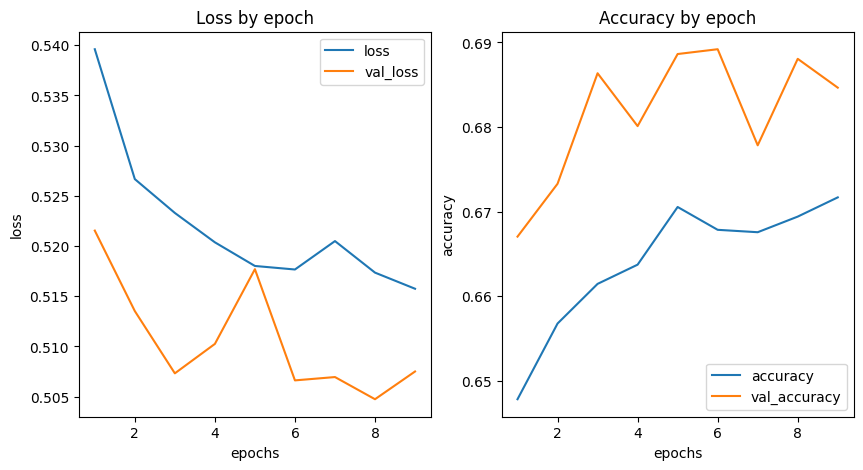

In [18]:
# 여기에 답안코드를 작성하세요: 학습 과정을 시각화 하시오.
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2)

ax[0].plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], label='loss')
ax[0].plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], label='val_loss')
ax[0].legend()
ax[0].set_title('Loss by epoch')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(np.arange(1, len(history.history['accuracy'])+1), history.history['accuracy'], label='accuracy')
ax[1].plot(np.arange(1, len(history.history['val_accuracy'])+1), history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
ax[1].set_title('Accuracy by epoch')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')

plt.show()

답안14_2 = fig

#### 문제 14 해설

이 문제는 학습 과정을 시각화하여 모델의 성능 변화를 분석하는 방법을 다룹니다. 학습 곡선을 그려보면 과적합이나 학습 부족 여부를 판단할 수 있습니다.

먼저 저장된 체크포인트에서 최적의 모델을 불러옵니다. `load_weights()` 메서드에 'checkpoint.keras' 파일 경로를 전달하면 검증 정확도가 가장 높았던 에포크의 가중치를 복원합니다. 이후 `evaluate()` 메서드로 검증 데이터에 대한 최종 성능을 평가하고, 결과의 두 번째 값인 정확도를 소수점 넷째 자리까지 반올림하여 답안14_1에 저장합니다. 실행 결과를 보면 정확도가 약 0.6911입니다.

다음으로 학습 과정을 시각화합니다. `plt.subplots()`로 1행 2열의 서브플롯을 생성하고, 각 그래프의 크기를 (10,5)로 설정합니다. 왼쪽 그래프에는 `history.history['loss']`와 `history.history['val_loss']`를 그려 훈련 손실과 검증 손실의 변화를 표시합니다. 오른쪽 그래프에는 `history.history['accuracy']`와 `history.history['val_accuracy']`를 그려 훈련 정확도와 검증 정확도의 변화를 표시합니다.

각 그래프에 제목, x축 레이블('epochs'), y축 레이블('loss' 또는 'accuracy')을 설정하고 `legend()`로 범례를 추가합니다. 왼쪽 그래프를 보면 훈련 손실은 계속 감소하지만 검증 손실은 중간에 등락을 반복하며, 오른쪽 그래프를 보면 검증 정확도가 에포크 6 부근에서 최고점을 찍은 후 이후 세 에포크 동안 더 나은 결과를 내지 못했음을 확인할 수 있습니다. EarlyStopping이 적절한 시점에 학습을 멈췄음을 보여줍니다.

- 아래 셀을 실행하여 채점하세요.

In [19]:
import importlib

try:
    import aice_ans
    importlib.reload(aice_ans)
    aice_ans.grade_answers(globals())
except ImportError:
    print("🚨 채점 파일을 찾을 수 없습니다.")
    print("왼쪽 사이드바의 '파일 업로드' 버튼을 눌러 채점 파일을 업로드했는지 확인해주세요.")
except Exception as e:
    print(f"🚨 채점 중 예상치 못한 오류가 발생했습니다: {e}")

📁 설정 파일 로드 완료: AICE Associate - E-commerce Shipping 2진 분류 문제
✅ 답안01: 정답입니다!
--------------------
✅ 답안02: 정답입니다!
--------------------
✅ 답안03: 정답입니다!
--------------------
✅ 답안04: 정답입니다!
--------------------
✅ 답안05: 정답입니다!
--------------------
✅ 답안06: 정답입니다!
--------------------
✅ 답안07: 정답입니다!
--------------------
✅ 답안08_1: 정답입니다!
--------------------
✅ 답안08_2: 정답입니다!
--------------------
✅ 답안09: 정답입니다!
--------------------
✅ 답안10: 정답입니다!
--------------------
✅ 답안12: 정답입니다!
--------------------
✅ 답안13_1: 정답입니다! (Dense: 3개 + 출력층, Dropout: 2개)
--------------------
✅ 답안13_2: 정답입니다! (EarlyStopping 정상 작동, best epoch: 6)
--------------------
✅ 답안14_1: 정답입니다! (값: 0.6892)
--------------------
✅ 답안14_2: 정답입니다!
--------------------

📊 채점 결과: 16/16 정답
📈 점수: 100.0%
